In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import percentile
from numpy import median
from numpy import abs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [2]:
# charger le dataset dans un DataFrame sans nom de colonnes
df = pd.read_csv('dataset_complet.csv',sep=';', encoding='utf-8', header=None)

# renommer les colonnes en leur attribuant des noms
df = df.rename(columns={0: 'DimDistrictFK', 1: 'DimStructurePK', 2: 'DimClientPK',3: 'SA',4: 'designationPRD',5: 'dateop',6: 'QUANTITE_TM'})

# afficher le DataFrame avec les colonnes renommées
print(df.head())

   DimDistrictFK  DimStructurePK  DimClientPK  SA      designationPRD  \
0            406            7267     655852.0  40  ESSENCE SANS PLOMB   
1            416            7341     405766.0  50              GASOIL   
2            416            7208     405212.0  44  ESSENCE SANS PLOMB   
3            406            7268     447387.0  44              GASOIL   
4            411            7308     400251.0  44  ESSENCE SANS PLOMB   

                    dateop QUANTITE_TM  
0  2015-02-02 00:00:00.000       2,241  
1  2017-11-23 00:00:00.000      10,803  
2  2015-02-14 00:00:00.000       5,229  
3  2019-03-09 00:00:00.000      11,634  
4  2017-06-08 00:00:00.000       5,061  


In [3]:
#converting designation

df['designationPRD'] = df['designationPRD'].replace({'GASOIL': 0, 'ESSENCE SANS PLOMB': 1})


In [4]:
df


,DimDistrictFK,DimStructurePK,DimClientPK,SA,designationPRD,dateop,QUANTITE_TM
0,406,7267,655852.0,40,1,2015-02-02 00:00:00.000,"2,241"
1,416,7341,405766.0,50,0,2017-11-23 00:00:00.000,"10,803"
2,416,7208,405212.0,44,1,2015-02-14 00:00:00.000,"5,229"
3,406,7268,447387.0,44,0,2019-03-09 00:00:00.000,"11,634"
4,411,7308,400251.0,44,1,2017-06-08 00:00:00.000,"5,061"
...,...,...,...,...,...,...,...
3345056,410,7304,453549.0,40,1,2017-08-30 00:00:00.000,"2,241"
3345057,410,7304,395651.0,50,0,2018-08-16 00:00:00.000,"13,296"
3345058,416,7232,405768.0,50,0,2020-02-06 00:00:00.000,"24,93"
3345059,416,7232,458637.0,44,1,2019-09-24 00:00:00.000,"2,241"


In [5]:
# Afficher toutes les valeurs uniques de la colonne 'DimStructurePK'
structures_pk = df['DimStructurePK'].unique()
print(structures_pk)

[7267 7341 7208 7268 7308 7298 7316 7358 7241 7218 7287 7283 7385 7351
 7332 7350 7314 7327 7344 7343 7261 7304 7232 7340 7342]


In [6]:
# Remplacer les virgules par des points et convertir en float
df['QUANTITE_TM'] = df['QUANTITE_TM'].apply(lambda x: float(x.replace(',', '.')))

# Afficher les types de données de chaque colonne dans le DataFrame
print(df.dtypes)

DimDistrictFK       int64
DimStructurePK      int64
DimClientPK       float64
SA                  int64
designationPRD      int64
dateop             object
QUANTITE_TM       float64
dtype: object


In [7]:
# Sélectionner les lignes avec DimStructurePK = 7218 et designationPRD = 1
df7218 = df[(df['DimStructurePK'] == 7218) & (df['designationPRD'] == 0)]

# Garder uniquement les colonnes 'dateop' et 'QUANTITE_TM'
df7218 = df7218[['dateop', 'QUANTITE_TM']]

# Afficher le DataFrame df7218
print(df7218)


                          dateop  QUANTITE_TM
42       2019-09-30 00:00:00.000       22.437
49       2018-03-06 00:00:00.000       22.437
53       2019-06-16 00:00:00.000       10.640
60       2016-03-09 00:00:00.000        9.880
61       2015-10-20 00:00:00.000        9.880
...                          ...          ...
3344992  2016-09-09 00:00:00.000       10.640
3345011  2018-09-13 00:00:00.000       10.803
3345012  2019-07-24 00:00:00.000       22.437
3345025  2015-09-08 00:00:00.000        9.880
3345037  2017-06-27 00:00:00.000       22.437

[98406 rows x 2 columns]


In [8]:
df=df7218

In [9]:
# Calcule du Z-score pour chaque valeur de la variable "QUANTITE_TM"
z_scores = np.abs((df['QUANTITE_TM'] - df['QUANTITE_TM'].mean()) / df['QUANTITE_TM'].std())

# Définir le seuil pour la détection des outliers
threshold = 3

# Trouver les indices des outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Afficher le nombre d'outliers trouvés
print(f"Nombre d'outliers trouvés: {len(outlier_indices)}")


Nombre d'outliers trouvés: 1788


In [10]:
# Convertir la colonne 'dateop' en type de données datetime
df['dateop'] = pd.to_datetime(df['dateop'])

# Créer une nouvelle colonne 'mois' contenant le mois extrait de la colonne 'dateop'
df['dateop'] = df['dateop'].dt.to_period('M')

# Calculer la somme des valeurs de 'QUANTITE_TM' par mois
df = df.groupby('dateop')['QUANTITE_TM'].sum().reset_index()

# Afficher le DataFrame avec la somme de 'QUANTITE_TM' par mois
print(df)
df

     dateop   QUANTITE_TM
0   2015-01  35214.677500
1   2015-02  34139.304500
2   2015-03  38073.250900
3   2015-04  37814.557000
4   2015-05  39684.270500
5   2015-06  40998.391500
6   2015-07  36741.801500
7   2015-08  43715.641900
8   2015-09  37258.953000
9   2015-10  40737.153500
10  2015-11  39863.617000
11  2015-12  41276.302200
12  2016-01  36322.205000
13  2016-02  34252.454000
14  2016-03  36511.395150
15  2016-04  37037.466000
16  2016-05  37700.117000
17  2016-06  34445.602950
18  2016-07  34599.075000
19  2016-08  40058.252000
20  2016-09  34974.241700
21  2016-10  36821.453000
22  2016-11  37065.816000
23  2016-12  38033.817900
24  2017-01  33660.864500
25  2017-02  30835.839400
26  2017-03  35794.310520
27  2017-04  34486.238900
28  2017-05  35326.256000
29  2017-06  30148.537000
30  2017-07  37050.593000
31  2017-08  39527.845400
32  2017-09  32883.340911
33  2017-10  34344.041000
34  2017-11  32727.658000
35  2017-12  35135.763000
36  2018-01  32215.698000
37  2018-02 

,dateop,QUANTITE_TM
0,2015-01,35214.677500
1,2015-02,34139.304500
2,2015-03,38073.250900
3,2015-04,37814.557000
4,2015-05,39684.270500
5,2015-06,40998.391500
6,2015-07,36741.801500
7,2015-08,43715.641900
8,2015-09,37258.953000
9,2015-10,40737.153500


In [11]:
#Transformer la variable de temps dateop en index du dataframe :
df = df.set_index('dateop')

In [12]:
df

,QUANTITE_TM
dateop,
2015-01,35214.677500
2015-02,34139.304500
2015-03,38073.250900
2015-04,37814.557000
2015-05,39684.270500
2015-06,40998.391500
2015-07,36741.801500
2015-08,43715.641900
2015-09,37258.953000


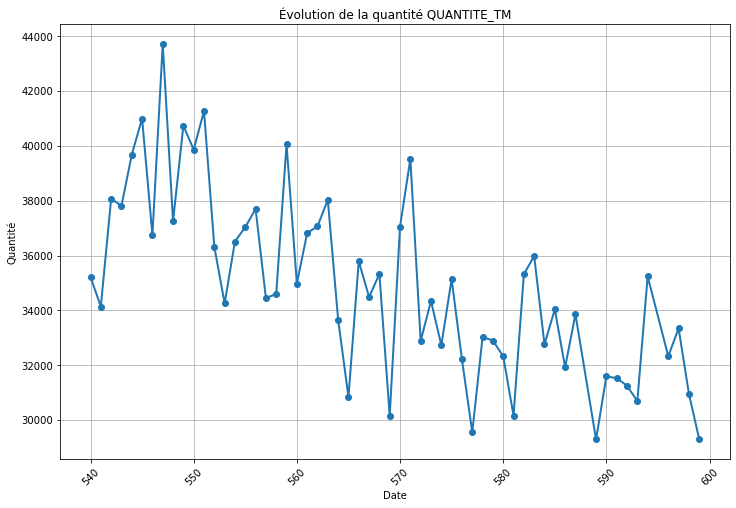

In [13]:
# Convertir l'index en valeurs numériques
df['dateop'] = df.index.astype('int')

# Tracer la courbe d'évolution
plt.figure(figsize=(12, 8))  
plt.plot(df['dateop'], df['QUANTITE_TM'], linewidth=2, marker='o', markersize=6)

# Ajouter des labels et un titre
plt.xlabel('Date')
plt.ylabel('Quantité')
plt.title('Évolution de la quantité QUANTITE_TM')

# Rotation des labels de l'axe x pour une meilleure lisibilité (facultatif)
plt.xticks(rotation=45)

# Afficher la grille (facultatif)
plt.grid(True)

# Afficher la courbe
plt.show()

#si je me trompe pas w lahou A3lem f had la station kayen Trends et non stationnaire. so we need differincing  
#Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

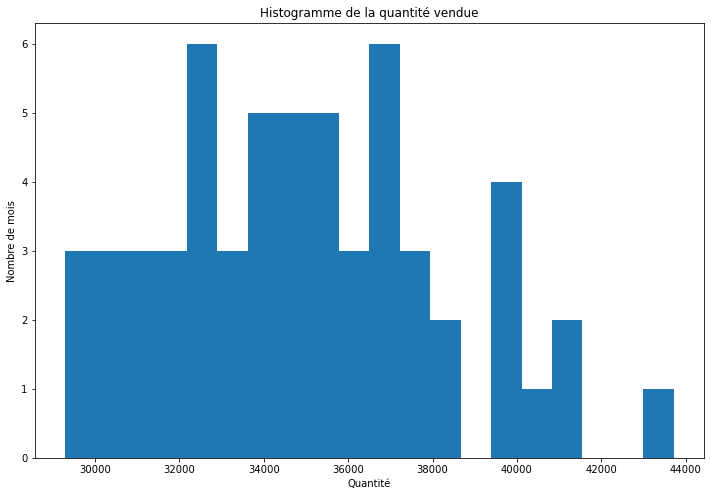

In [14]:
# Histogramme de la variable 'QUANTITE_TM'
plt.figure(figsize=(12, 8))  
plt.hist(df['QUANTITE_TM'], bins=20)
plt.title('Histogramme de la quantité vendue')
plt.xlabel('Quantité')
plt.ylabel('Nombre de mois')
plt.show()

C:\Users\abdel\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


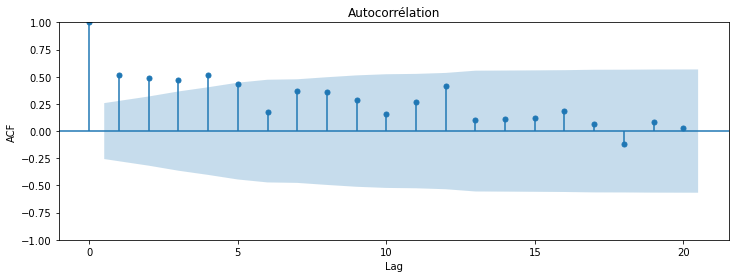

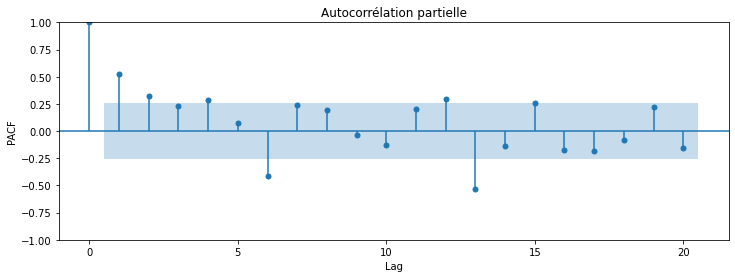

In [15]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Série temporelle
ts = df['QUANTITE_TM']

# Analyse ACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(ts, lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrélation')

# Analyse PACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(ts, lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Autocorrélation partielle')

plt.show()

#Ce code génère deux graphiques : l'ACF (autocorrélation) et la PACF (autocorrélation partielle) avec des lags allant jusqu'à 20. Vous pouvez ajuster la valeur de lags selon vos besoins. Les graphiques vous aideront à identifier les ordres AR, MA et I en fonction des valeurs significatives de corrélation dans les lags.

In [16]:
# Diviser les données en deux jeux de données : un ensemble d'entraînement et un ensemble de test
train = df.loc['2015-01-01':'2018-12-31']['QUANTITE_TM']
test = df.loc[df.index > '2018-12-31']['QUANTITE_TM']

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [18]:
# Normaliser les données entre 0 et 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# Diviser les données en ensembles d'entraînement et de test
train_size = int(len(scaled_data) * 0.8)  # 80% des données pour l'entraînement
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Préparer les séquences d'entrée et de sortie pour l'entraînement et le test
def prepare_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 3  # Nombre de pas de temps pour chaque séquence
X_train, y_train = prepare_sequences(train_data, n_steps)
X_test, y_test = prepare_sequences(test_data, n_steps)


In [19]:
print(X_train.shape)
print(X_train)


(43, 3, 2)
[[[0.41075746 0.        ]
  [0.33621821 0.01694915]
  [0.60889887 0.03389831]]

 [[0.33621821 0.01694915]
  [0.60889887 0.03389831]
  [0.59096755 0.05084746]]

 [[0.60889887 0.03389831]
  [0.59096755 0.05084746]
  [0.72056635 0.06779661]]

 [[0.59096755 0.05084746]
  [0.72056635 0.06779661]
  [0.81165437 0.08474576]]

 [[0.72056635 0.06779661]
  [0.81165437 0.08474576]
  [0.51660973 0.10169492]]

 [[0.81165437 0.08474576]
  [0.51660973 0.10169492]
  [1.         0.11864407]]

 [[0.51660973 0.10169492]
  [1.         0.11864407]
  [0.55245598 0.13559322]]

 [[1.         0.11864407]
  [0.55245598 0.13559322]
  [0.79354671 0.15254237]]

 [[0.55245598 0.13559322]
  [0.79354671 0.15254237]
  [0.73299771 0.16949153]]

 [[0.79354671 0.15254237]
  [0.73299771 0.16949153]
  [0.83091769 0.18644068]]

 [[0.73299771 0.16949153]
  [0.83091769 0.18644068]
  [0.48752549 0.20338983]]

 [[0.83091769 0.18644068]
  [0.48752549 0.20338983]
  [0.34406114 0.22033898]]

 [[0.48752549 0.20338983]
  [

In [20]:
import numpy as np

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Créer le modèle LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)





Epoch 1/50
3/3 [==============================] - 1s 4ms/step - loss: 0.2287
Epoch 2/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2111
Epoch 3/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1946
Epoch 4/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1784
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1630
Epoch 6/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1475
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1323
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.1172
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 0.1030
Epoch 10/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0894
Epoch 11/50
3/3 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 12/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0664
Epoch 13/50
3/3 [==============================] - 0s 3ms/step - loss: 0.

In [21]:
test_data

array([[1.82677945e-01, 7.79661017e-01],
       [3.16462833e-01, 7.96610169e-01],
       [0.00000000e+00, 8.30508475e-01],
       [1.59658227e-01, 8.47457627e-01],
       [1.54926383e-01, 8.64406780e-01],
       [1.35900306e-01, 8.81355932e-01],
       [9.68353925e-02, 8.98305085e-01],
       [4.12153977e-01, 9.15254237e-01],
       [2.10432801e-01, 9.49152542e-01],
       [2.81001734e-01, 9.66101695e-01],
       [1.15604312e-01, 9.83050847e-01],
       [3.08312176e-04, 1.00000000e+00]])

In [35]:
# Calculate the maximum and minimum values
max_value = np.max(df['QUANTITE_TM'])
min_value = np.min(df['QUANTITE_TM'])

test_data = test_data.reshape(-1, 1, 2)


# Generate predictions using your model (assuming you have already trained and loaded it)
test_predictions = model.predict(test_data)

# Invert the normalization of the predictions
test_predictions = (test_predictions * (max_value - min_value)) + min_value

# Display the predictions
print(test_predictions.flatten())


1/1 [==============================] - 0s 16ms/step
[31616.82  31759.715 31493.31  31653.102 31663.3   31660.39  31641.51
 31963.02  31795.78  31883.521 31741.115 31664.127]


In [36]:
from sklearn.metrics import mean_squared_error
test_predictions = test_predictions[:10]

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(test, test_predictions))
print('RMSE:', rmse)


RMSE: 1706.7182461622697


In [39]:
y_true = np.squeeze(test)
y_pred = np.squeeze(test_predictions)
print(y_true)
print(y_pred)

dateop
2019-02    29288.706000
2019-03    31592.085000
2019-04    31523.819000
2019-05    31249.331000
2019-06    30685.744000
2019-07    35234.825000
2019-09    32324.606535
2019-10    33342.700000
2019-11    30956.522000
2019-12    29293.154000
Freq: M, Name: QUANTITE_TM, dtype: float64
[31616.82  31759.715 31493.31  31653.102 31663.3   31660.39  31641.51
 31963.02  31795.78  31883.521]


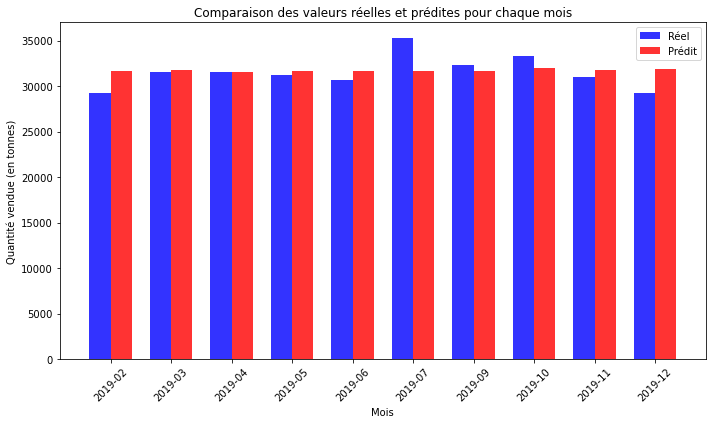

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Définir les données
y_true = np.squeeze(y_true)
y_pred = np.squeeze(y_pred)
months = df.loc[df.index > '2018-12-31'].index.astype(str)

# Créer la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Créer les barres pour les valeurs réelles et prédites
bar_width = 0.35
opacity = 0.8
index = np.arange(len(months))
rects1 = ax.bar(index, y_true, bar_width, alpha=opacity, color='b', label='Réel')
rects2 = ax.bar(index + bar_width, y_pred, bar_width, alpha=opacity, color='r', label='Prédit')

# Ajouter des étiquettes, un titre et une légende
ax.set_xlabel('Mois')
ax.set_ylabel('Quantité vendue (en tonnes)')
ax.set_title('Comparaison des valeurs réelles et prédites pour chaque mois')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(months, rotation=45)
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()
